In [1]:
%load_ext lab_black

In [1]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
import Data
from include.loss import pixel_weighted_cross_entropy
import model_eval
import models.reg as rm
import seaborn as sns


import matplotlib_functions as mympf

mympf.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"
dir_plots = "pres-inv"

2023-03-21 18:26:34.944810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

# Histogram res Boxberg

In [95]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"
dir_res_box = os.path.join(dir_res, "inversion/inv_box_sweep")

In [96]:
name_model_0 = os.path.join(dir_res_box, "none_essential")
data_0 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_0),
    path_eval_nc,
)

model_0 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_0), name_w="w_best.h5"
)
metrics_0 = model_eval.get_inv_metrics_model_on_data(model_0, data_0)

197/197 [==============================] - 1s 4ms/step


In [97]:
name_model_1 = os.path.join(dir_res_box, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

model_1 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_1), name_w="w_best.h5"
)
metrics_1 = model_eval.get_inv_metrics_model_on_data(model_1, data_1)

197/197 [==============================] - 1s 4ms/step


In [98]:
name_model_2 = os.path.join(dir_res_box, "no2_essential")
data_2 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_2),
    path_eval_nc,
)

model_2 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_2), name_w="w_best.h5"
)
metrics_2 = model_eval.get_inv_metrics_model_on_data(model_2, data_2)

197/197 [==============================] - 1s 4ms/step


In [99]:
first_col = "Relative error to true emissions (%)"
second_col = "Add. input:"
df_mape_0 = pd.DataFrame(
    {first_col: metrics_0["mape"], second_col: "No additional input"}
)
df_mape_1 = pd.DataFrame({first_col: metrics_1["mape"], second_col: "Segmentation"})
df_mape_2 = pd.DataFrame({first_col: metrics_2["mape"], second_col: "NO2"})
df_mape = pd.concat([df_mape_0, df_mape_1, df_mape_2])

In [57]:
mympf.setMatplotlibParam_singlefig()

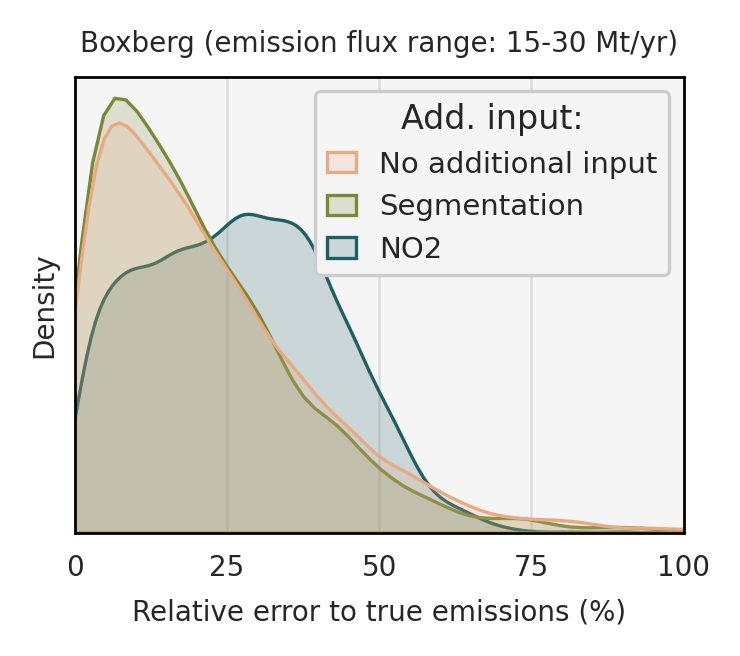

In [58]:
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
ax = axs[0]
sns.kdeplot(
    data=df_mape,
    x=first_col,
    common_norm=True,
    hue=second_col,
    fill=True,
    alpha=0.2,
    ax=ax,
    palette="cmc.batlowW_r",
)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_title("Boxberg (emission flux range: 15-30 Mt/yr)")
plt.savefig(os.path.join(dir_plots, "box_hist.png"), transparent=True)

# Histogram res Lippendorf

In [2]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forLip_2/valid_dataset.nc"
dir_res_box = os.path.join(dir_res, "inversion/inv_lip_sweep")

In [3]:
name_model_0 = os.path.join(dir_res_box, "none_essential")
data_0 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_0),
    path_eval_nc,
)

model_0 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_0), name_w="w_best.h5"
)
metrics_0 = model_eval.get_inv_metrics_model_on_data(model_0, data_0)

2023-03-21 18:26:49.253096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 18:26:56.222007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14427 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5
2023-03-21 18:26:58.267636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-21 18:26:59.208834: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 3s 5ms/step


In [4]:
name_model_1 = os.path.join(dir_res_box, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

model_1 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_1), name_w="w_best.h5"
)
metrics_1 = model_eval.get_inv_metrics_model_on_data(model_1, data_1)

197/197 [==============================] - 1s 5ms/step


In [5]:
name_model_2 = os.path.join(dir_res_box, "no2_essential")
data_2 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_2),
    path_eval_nc,
)

model_2 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_2), name_w="w_best.h5"
)
metrics_2 = model_eval.get_inv_metrics_model_on_data(model_2, data_2)

197/197 [==============================] - 1s 5ms/step


In [6]:
first_col = "Relative error to true emissions (%)"
second_col = "Add. input:"
df_mape_0 = pd.DataFrame(
    {first_col: metrics_0["mape"], second_col: "No additional input"}
)
df_mape_1 = pd.DataFrame({first_col: metrics_1["mape"], second_col: "Segmentation"})
df_mape_2 = pd.DataFrame({first_col: metrics_2["mape"], second_col: "NO2"})
df_mape = pd.concat([df_mape_0, df_mape_1, df_mape_2])

In [10]:
df_mape_2.describe()

,Relative error to true emissions (%)
count,6289.000000
mean,24.896973
std,22.112652
min,0.005051
25%,9.446962
50%,19.842558
75%,34.177322
max,295.427063


In [64]:
mympf.setMatplotlibParam_singlefig()

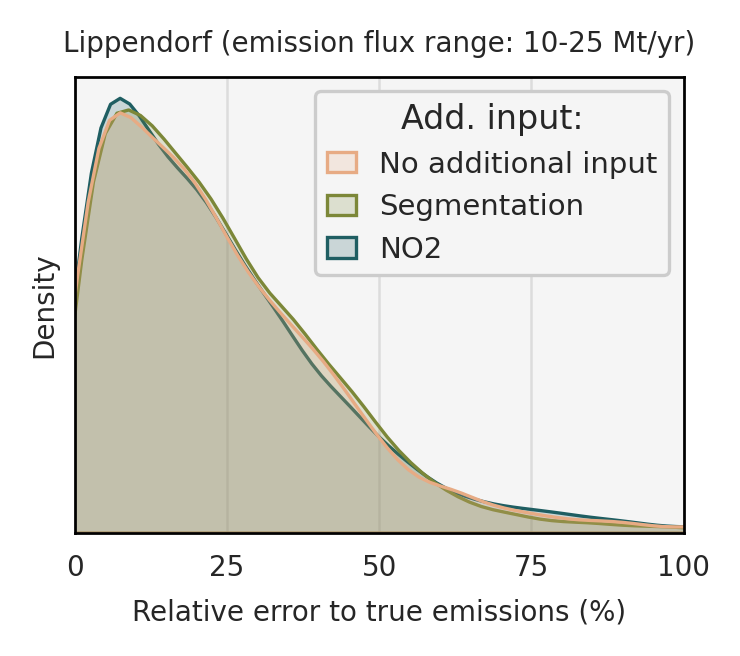

In [65]:
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
ax = axs[0]
sns.kdeplot(
    data=df_mape,
    x=first_col,
    common_norm=True,
    hue=second_col,
    fill=True,
    alpha=0.2,
    ax=ax,
    palette="cmc.batlowW_r",
)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_title("Lippendorf (emission flux range: 10-25 Mt/yr)")
plt.savefig(os.path.join(dir_plots, "lip_hist.png"), transparent=True)

# Histogram res Patnow

In [11]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Pat/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forPat_2/valid_dataset.nc"
dir_res_box = os.path.join(dir_res, "inversion/inv_pat_sweep")

In [12]:
name_model_0 = os.path.join(dir_res_box, "none_essential")
data_0 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_0),
    path_eval_nc,
)

model_0 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_0), name_w="w_best.h5"
)
metrics_0 = model_eval.get_inv_metrics_model_on_data(model_0, data_0)

197/197 [==============================] - 1s 4ms/step


In [13]:
name_model_1 = os.path.join(dir_res_box, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

model_1 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_1), name_w="w_best.h5"
)
metrics_1 = model_eval.get_inv_metrics_model_on_data(model_1, data_1)

197/197 [==============================] - 1s 5ms/step


In [14]:
name_model_2 = os.path.join(dir_res_box, "no2_essential")
data_2 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_2),
    path_eval_nc,
)

model_2 = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model_2), name_w="w_best.h5"
)
metrics_2 = model_eval.get_inv_metrics_model_on_data(model_2, data_2)

197/197 [==============================] - 1s 4ms/step


In [15]:
first_col = "Relative error to true emissions (%)"
second_col = "Add. input:"
df_mape_0 = pd.DataFrame(
    {first_col: metrics_0["mape"], second_col: "No additional input"}
)
df_mape_1 = pd.DataFrame({first_col: metrics_1["mape"], second_col: "Segmentation"})
df_mape_2 = pd.DataFrame({first_col: metrics_2["mape"], second_col: "NO2"})
df_mape = pd.concat([df_mape_0, df_mape_1, df_mape_2])

In [16]:
df_mape_2.describe()

,Relative error to true emissions (%)
count,6289.000000
mean,38.037338
std,37.666172
min,0.000159
25%,11.828093
50%,27.218624
75%,52.881462
max,661.159058


In [71]:
mympf.setMatplotlibParam_singlefig()

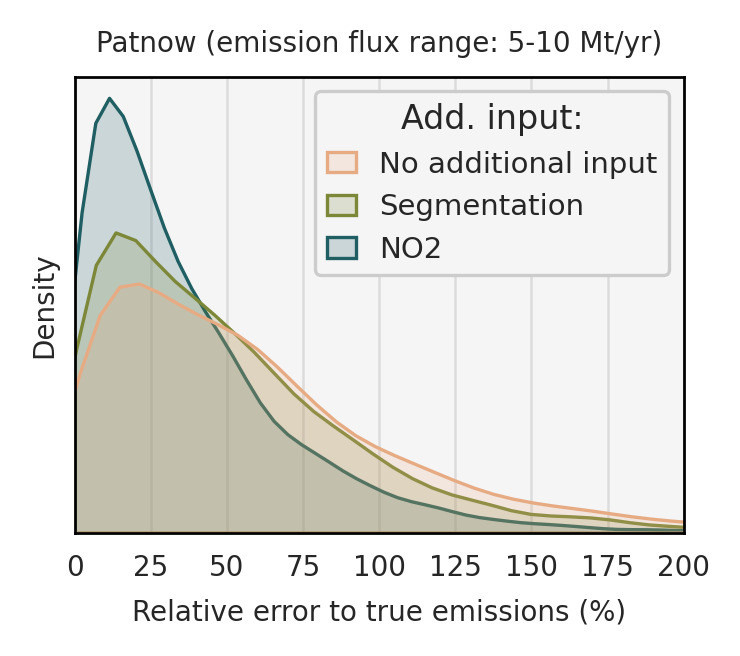

In [72]:
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
ax = axs[0]
sns.kdeplot(
    data=df_mape,
    x=first_col,
    common_norm=True,
    hue=second_col,
    fill=True,
    alpha=0.2,
    ax=ax,
    palette="cmc.batlowW_r",
)
ax.set_xticks([0, 25, 50, 75, 100, 125, 150, 175, 200])
ax.set_xlim(0, 200)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_title("Patnow (emission flux range: 5-10 Mt/yr)")
plt.savefig(os.path.join(dir_plots, "pat_hist.png"), transparent=True)

#  Inversion set-up 1

In [130]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"
dir_res_box = os.path.join(dir_res, "inversion/inv_box_sweep")

In [131]:
name_model_1 = os.path.join(dir_res_box, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

In [132]:
name_model_2 = os.path.join(dir_res_box, "no2_essential")
data_2 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_2),
    path_eval_nc,
)

In [133]:
mympf.setMatplotlibParam_singlefig()
plt.viridis()

<Figure size 1200x900 with 0 Axes>

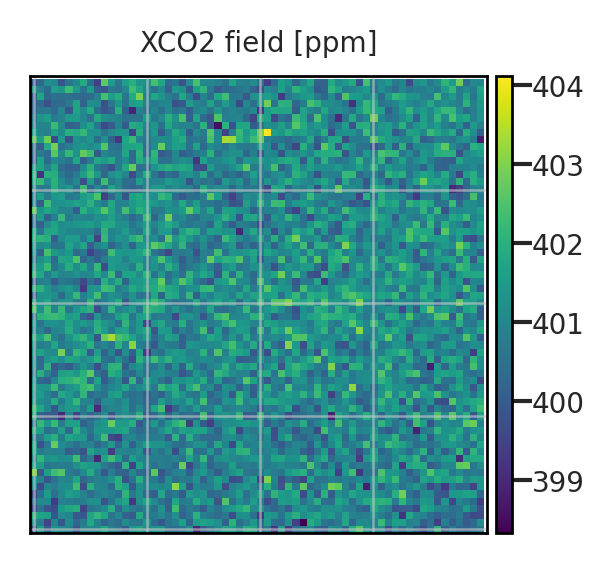

In [134]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
idx = 50
i_ax = 0
ax = axs[i_ax]
im = ax.imshow(np.squeeze(data.x.eval[idx, :, :, 0]), origin="lower")
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("XCO2 field [ppm]")
plt.savefig(os.path.join(dir_plots, "box_xco2_input.png"), transparent=True)

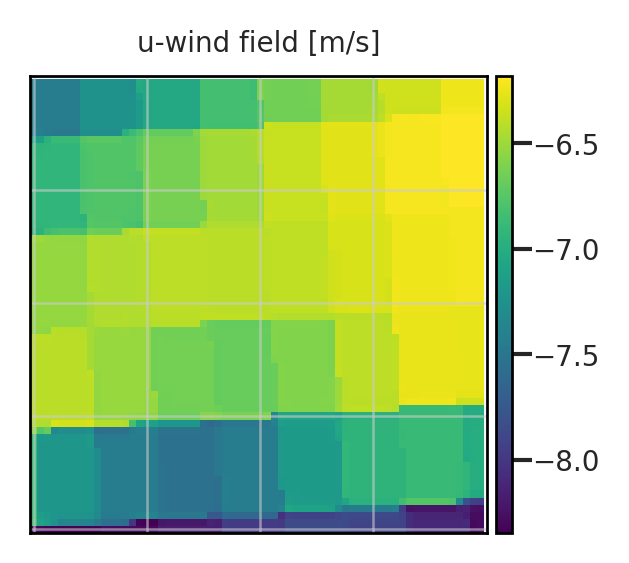

In [117]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
idx = 50
i_ax = 0
ax = axs[i_ax]
im = ax.imshow(np.squeeze(data.x.eval[idx, :, :, 2]), origin="lower")
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("u-wind field [m/s]")
plt.savefig(os.path.join(dir_plots, "box_wind_input.png"), transparent=True)

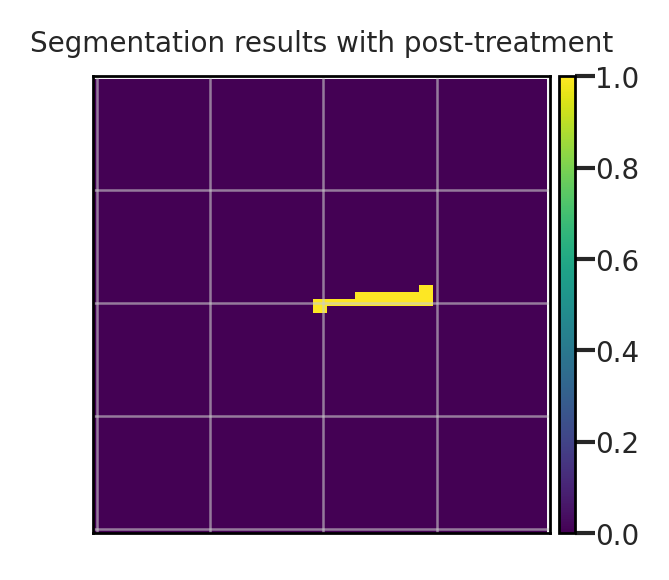

In [118]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
idx = 50
i_ax = 0
ax = axs[i_ax]
im = ax.imshow(np.squeeze(data.x.eval[idx, :, :, 4]), origin="lower")
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Segmentation results with post-treatment")
plt.savefig(os.path.join(dir_plots, "box_seg_input.png"), transparent=True)

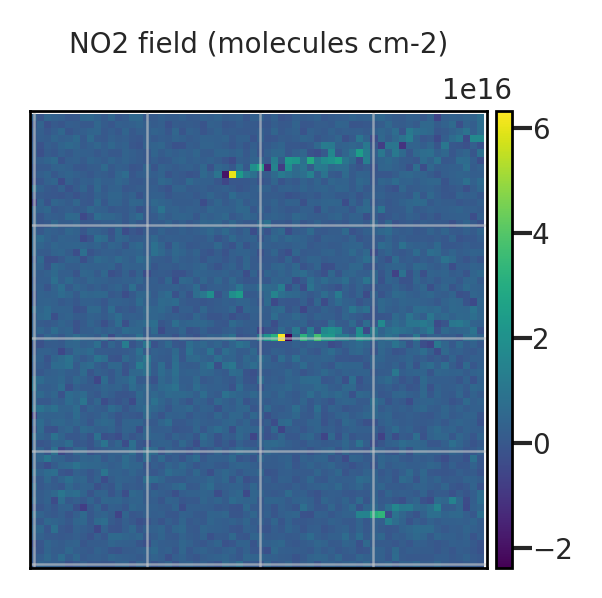

In [119]:
data = data_2
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
idx = 50
i_ax = 0
ax = axs[i_ax]
im = ax.imshow(np.squeeze(data.x.eval[idx, :, :, 4]), origin="lower")
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("NO2 field (molecules cm-2)")
plt.savefig(os.path.join(dir_plots, "box_no2_input.png"), transparent=True)

# Inversion set-up 2

In [185]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"
dir_res_box = os.path.join(dir_res, "inversion/inv_box_sweep")

In [186]:
name_model_1 = os.path.join(dir_res_box, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

[23.47809982]


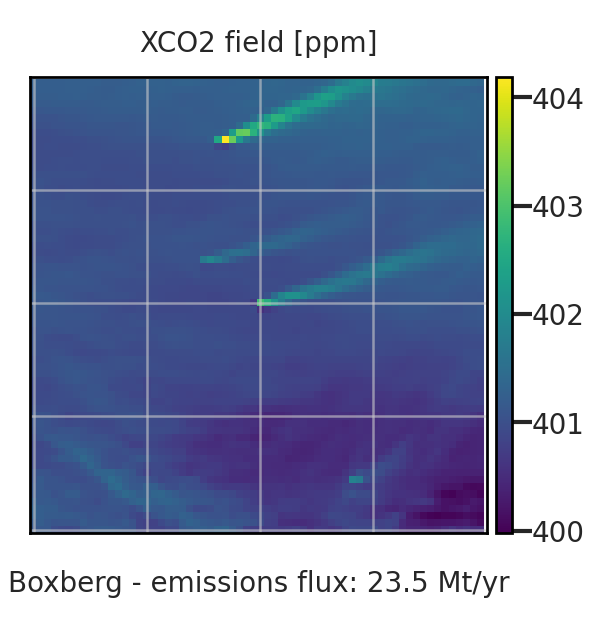

In [187]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
idx = 65
print(data.y.eval[idx])
i_ax = 0
ax = axs[i_ax]
im = ax.imshow(
    np.squeeze(Data.get_xco2_noiseless(data.ds)[idx, :, :, 0]), origin="lower"
)
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel(f"Boxberg - emissions flux: {data.y.eval[idx][0]:.1f} Mt/yr")
ax.set_title("XCO2 field [ppm]")
plt.savefig(os.path.join(dir_plots, "box_xco2_noiseless.png"), transparent=True)

In [194]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Pat/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forPat_2/valid_dataset.nc"
dir_res_pat = os.path.join(dir_res, "inversion/inv_pat_sweep")

In [195]:
name_model_1 = os.path.join(dir_res_pat, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

[5.36311007]


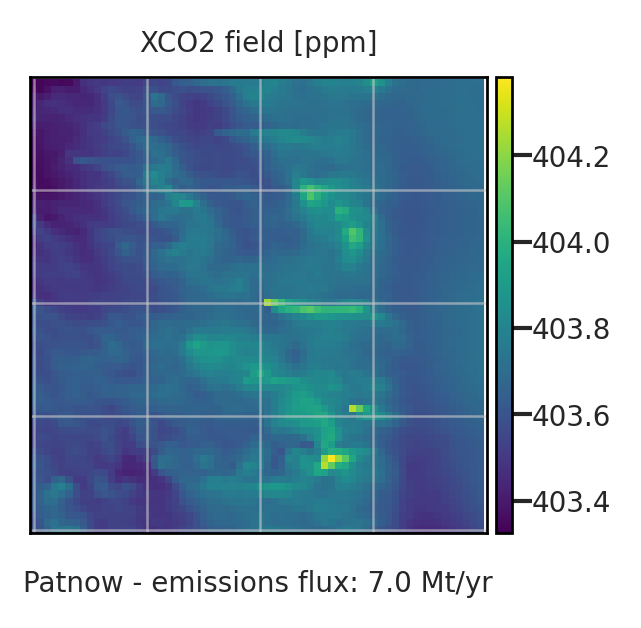

In [196]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
print(data.y.eval[idx])
idx = 1600
i_ax = 0
ax = axs[i_ax]
im = ax.imshow(
    np.squeeze(Data.get_xco2_noiseless(data.ds)[idx, :, :, 0]), origin="lower"
)
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_xlabel(f"Patnow - emissions flux: {data.y.eval[idx][0]:.1f} Mt/yr")
ax.set_yticklabels([])
ax.set_title("XCO2 field [ppm]")
plt.savefig(os.path.join(dir_plots, "pat_xco2_noiseless.png"), transparent=True)

# Data augmentation scaling

In [197]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forLip_2/valid_dataset.nc"
dir_res_lip = os.path.join(dir_res, "inversion/inv_lip_sweep")

In [198]:
name_model_1 = os.path.join(dir_res_lip, "perf_seg_essential")
data_1 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model_1),
    path_eval_nc,
)

[14.04304981]


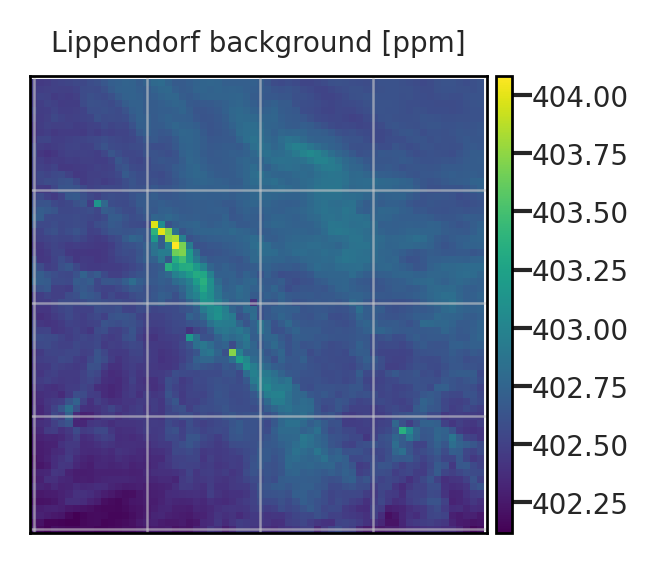

In [206]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.25,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
print(data.y.eval[idx])
idx = 700
i_ax = 0
ax = axs[i_ax]
data_plot = np.squeeze(Data.get_xco2_noiseless(data.ds)[idx, :, :, 0]) - np.squeeze(
    Data.get_plume(data.ds)[idx, :, :, 0]
)
im = ax.imshow(data_plot, origin="lower")
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Lippendorf background [ppm]")
plt.savefig(os.path.join(dir_plots, "lip_background.png"), transparent=True)

[14.04304981]


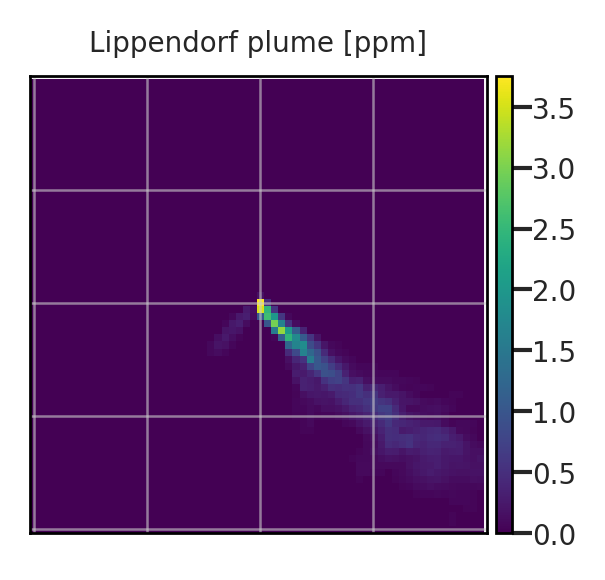

In [204]:
data = data_1
axs = mympf.set_figure_axs(
    1,
    1,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.2,
    pad_w_ext_right=0.2,
    pad_w_int=0.2,
    pad_h_ext=0.35,
    pad_h_int=0.25,
)
Ny = int(data.x.eval.shape[1])
Nx = int(data.x.eval.shape[2])
print(data.y.eval[idx])
idx = 700
i_ax = 0
ax = axs[i_ax]
data_plot = np.squeeze(Data.get_plume(data.ds)[idx, :, :, 0])
im = ax.imshow(data_plot, origin="lower")
cax = ax.inset_axes((1.02, 0, 0.035, 1))
cbar = plt.colorbar(im, cax, orientation="vertical")
ax.set_xticks([0, int(Ny / 4), int(Ny / 2), int(Ny * 3 / 4), Ny])
ax.set_yticks([0, int(Nx / 4), int(Nx / 2), int(Nx * 3 / 4), Nx])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Lippendorf plume [ppm]")
plt.savefig(os.path.join(dir_plots, "lip_plume.png"), transparent=True)